In [12]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


In [13]:

# Load the Excel file
df = pd.read_excel("/Users/azadesel/Desktop/Macbook 17/Zelenskyy_Securitization/tweets/data.xlsx")
df['Countries'] = df['Countries'].str.strip()

In [14]:
name_map = {
    'USA': 'United States of America',
    'UK': 'United Kingdom',
    'Russia': 'Russian Federation',
}
df['Countries'] = df['Countries'].replace(name_map)

In [15]:

# Load shapefile
world = gpd.read_file("/Users/azadesel/Downloads/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
world = world[world['ADMIN'] != 'Antarctica']  # Remove Antarctica

In [24]:
def plot_issue_map(issue):
    issue_data = df[df['Issues'] == issue]
    country_counts = issue_data['Countries'].value_counts().reset_index()
    country_counts.columns = ['name', 'count']

    # Merge and log-transform
    merged = world.merge(country_counts, left_on='ADMIN', right_on='name', how='left')
    merged['count'] = merged['count'].fillna(0)
    merged['log_count'] = np.log1p(merged['count'])

    # Setup color mapping
    cmap = plt.cm.YlGnBu
    norm = mpl.colors.Normalize(vmin=0, vmax=merged['log_count'].max())

    fig, ax = plt.subplots(figsize=(15, 10))
    merged.plot(
        column='log_count',
        cmap=cmap,
        norm=norm,
        linewidth=0.5,
        ax=ax,
        edgecolor='0.6',
        legend=False,
        missing_kwds={'color': 'white'}
    )

    # Custom legend
    sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    # Dynamically calculate real mention values for the legend
    max_count = int(merged['count'].max())
    # Define a clean range up to the next rounded threshold
    if max_count <= 100:
        real_ticks = [0, 1, 5, 10, 25, 50, 100]
    else:
        base_ticks = [0, 1, 5, 10, 25, 50, 100]
        extra_ticks = [v for v in [250, 500, 1000, 2000, 5000] if v <= max_count * 1.1]
        real_ticks = base_ticks + extra_ticks

    log_ticks = np.log1p(real_ticks)

    cbar = fig.colorbar(
        sm,
        ax=ax,
        orientation='vertical',
        shrink=0.6,
        aspect=30,
        pad=0.02,
        ticks=log_ticks
    )
    cbar.ax.set_yticklabels([str(v) for v in real_ticks])
    cbar.set_label("Number of Retweets", fontsize=12)

    # Finalize plot
    ax.set_title(f"Distribution of Reposts on:\n{issue}", fontsize=18, fontweight='bold')
    ax.axis('off')
    plt.tight_layout()
    plt.show()

    # Save JPEG
    safe_title = issue[:40].replace(' ', '_').replace('/', '_')
    fig.savefig(f"{safe_title}.jpeg", dpi=300, format='jpeg', bbox_inches='tight')
    print(f"Saved: {safe_title}.jpeg")
    plt.close(fig)

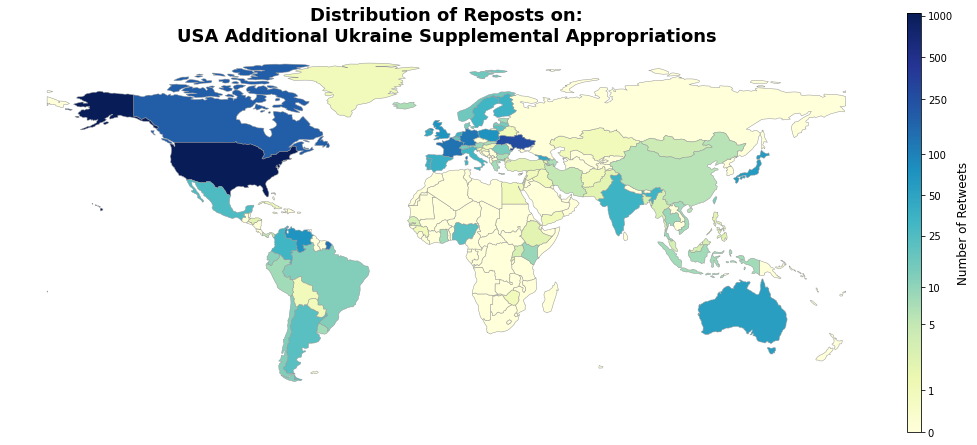

Saved: USA_Additional_Ukraine_Supplemental_Appr.jpeg


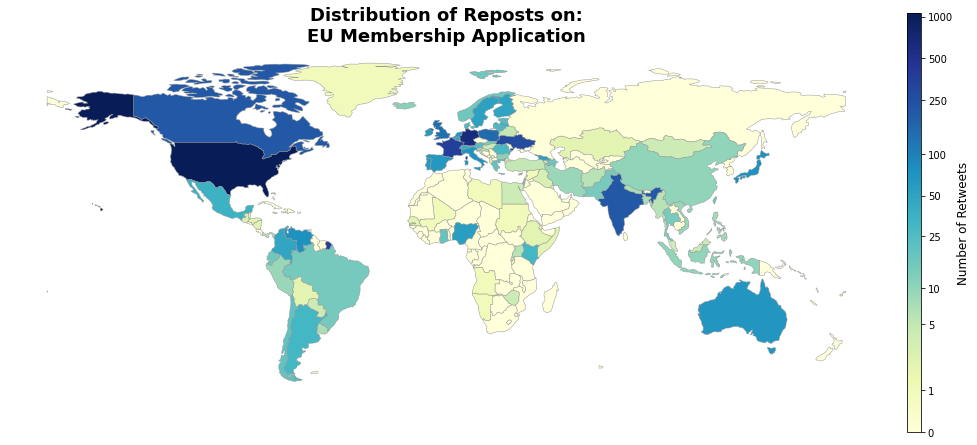

Saved: EU_Membership_Application.jpeg


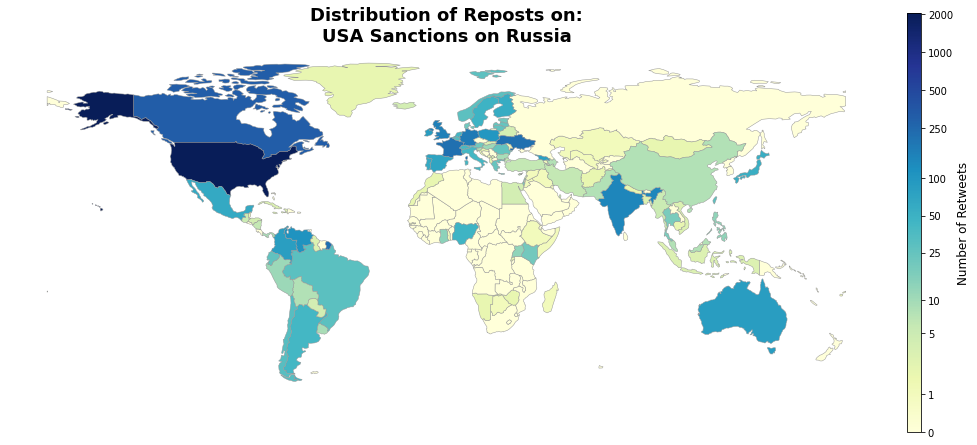

Saved: USA_Sanctions_on_Russia.jpeg


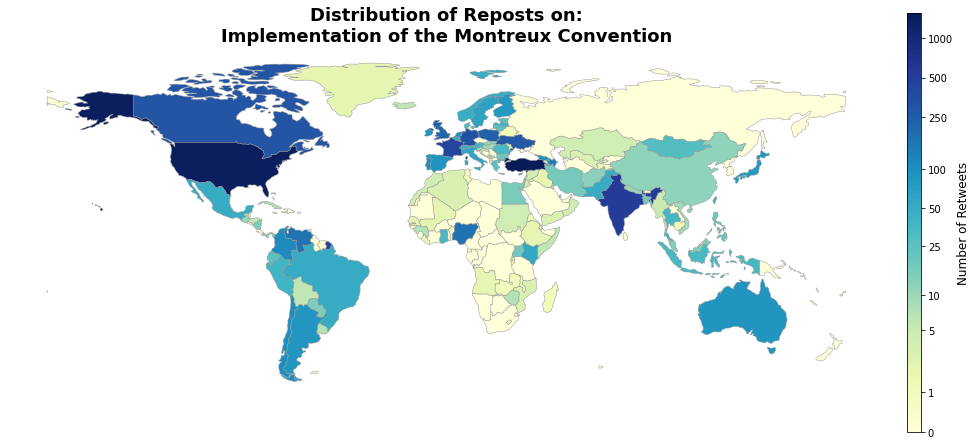

Saved: Implementation_of_the_Montreux_Conventio.jpeg


In [25]:
# Run for all unique issues
for issue in df['Issues'].unique():
    plot_issue_map(issue)